In [14]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import string as str

from pandas.plotting import autocorrelation_plot
from numpy import random
from scipy import stats


In [15]:
def linear_congruential_scheme(a,b,c,x0,N):
    
    n = list(range(0, N+1))

    x_i = []
    x_ii = [] # Normalizes Array
    x_1 = [] # x_(i+1)
    x_p = [] # For period determination. 
    
    x_i = np.append(x_i,x0) 
    
    for i in range (0,N+1):
        x_i = np.append(x_i,((((a*(x_i[i])) + b) % c)))
    

    # Normalizing x_i. with x0
         
    for i in range (0,N+1):
        x_ii = np.append(x_ii,x_i[i]/c)
    
    # Normalizing x_1. without x0
    
    for i in range (0,N+1):
        x_1 = np.append(x_1,x_i[i+1]/c)

    print(x_ii)
    
    #'''
    plt.scatter(n, x_ii)
    plt.xlabel('N')
    plt.ylabel('x_i')
    plt.show()   
    
    plt.scatter(x_ii, x_1)
    plt.xlabel('x_i') # x_ii
    plt.ylabel('x_(i+1)')
    plt.show()   

    # Determing the correlation.
    
    autocorrelation_plot(x_1);
      
        
     

[0.0390625  0.23046875 0.140625   ... 0.34375    0.59765625 0.0703125 ]


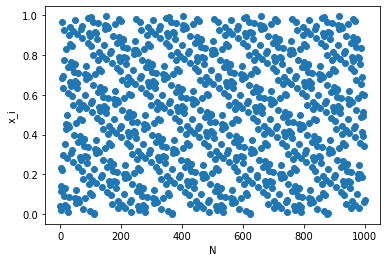

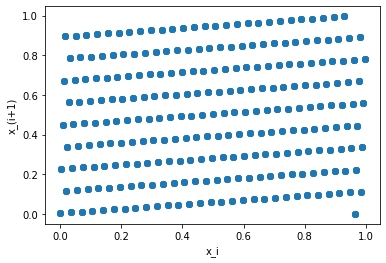

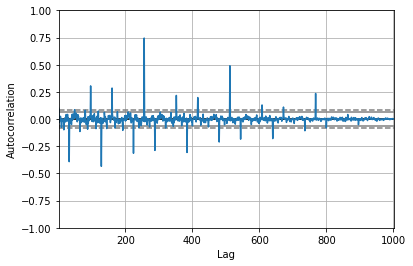

In [16]:
a = 57
b = 1
c = 256
xo = 10
N = 1000
        
linear_congruential_scheme(a,b,c,xo,N)      
  

In [17]:
def linear_congruential_scheme_2(a,b,c,x0):
    
    xc = ((((a*(x0)) + b) % c)) 
    
    return xc


In [18]:
a, b, c, x0 = 57, 1, 256, 10
arr1 = []
arr1 = np.append(arr1,x0)
period, xi= 0, x0
while xi != x0 or period == 0:
    xi1 = linear_congruential_scheme_2(a, b, c, xi)
    np.append(arr1,xi1)
    xi = xi1
    period += 1
print("Period of the Random Number Generator is  ", period)


Period of the Random Number Generator is   256


In [19]:

def plotA(counter_distribution_array):
            
  plt.scatter(np.arange(0, len(counter_distribution_array), 1), counter_distribution_array)
  plt.title('Gap Test for between 0 and 1. ')
  plt.xlabel('Index')
  plt.ylabel('Count Tally')
  plt.show()



#### (c) Tests of Mersenne Twister PRNG

KstestResult(statistic=0.03571428571428571, pvalue=0.409667595936363)
KstestResult(statistic=0.15865527691046433, pvalue=0.0)


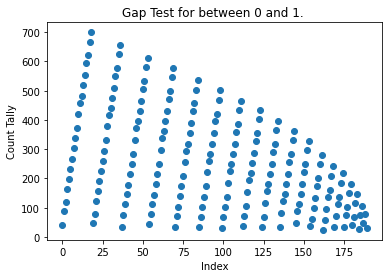

In [20]:
# Mersenne Twister PRNG

N = 700

random.seed()
random_numbers_arr = [random.random() for i in range(N)]


# Kolmogorov-Smirnov test

print(stats.kstest(random_numbers_arr, np.random.uniform(0, 1, N), alternative='less'))


# Independence Test

mean_array_RN = np.mean(random_numbers_arr)

prime_num_array = [i - mean_array_RN for i in random_numbers_arr]


def autocorrelation_function(i, j):

    tot_sum_A, tot_sum_B, tot_sum_C = 0, 0, 0
    M = 0

    for f in range(N):
        if (i + (f + 1) * j) <= (N - 1):
            M = f

    if M != 0:

        for k in range(M+1):

            tot_sum_A += prime_num_array[i+k*j] * prime_num_array[i+(k+1)*j]
            tot_sum_B += (prime_num_array[i+k*j])**2
            tot_sum_C += (prime_num_array[i+(k+1)*j])**2

        Rho_calc = tot_sum_A/(np.sqrt(tot_sum_B) * np.sqrt(tot_sum_C))
    else:
        Rho_calc = None
    return  Rho_calc 

autocorrelation_distribution_array = []
indices_array = []
index = 0

for j in range(N):
    for i in range(j):

        result = autocorrelation_function(i,j)

        if result is not None:

            autocorrelation_distribution_array.append(result)
            indices_array = np.append(indices_array,index)
        index = index + 1

# Testing consistency of autocorrelation_function distribution with Gaussian(norm) distribution using Kolmogorov-Smirnov test
print(stats.kstest(autocorrelation_distribution_array, 'norm', N = N))




# Gap Test
arrA = np.linspace(0, 1, 20)
arrB = np.linspace(0, 1, 20)

counter = 0
counter_distribution_array = []

for i in arrA:
    for j in arrB:

        if j > i:    

            for k in range(N):

                if i <= random_numbers_arr[k] and random_numbers_arr[k] <= j:

                    counter += 1

            counter_distribution_array.append(counter)
            counter = 0

plotA(counter_distribution_array)


In [21]:
def encryption_mesage(ptext):

  arr_alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z',',','.',' ']
  arr_alphabet_pos = []

  arr_alphabet_array = np.array(arr_alphabet)
  
  #print(arr_alphabet_array)
  #print(arr_alphabet_array[2])
  #print(arr_alphabet[2])



#print("Universsal set Array: \n",arr_alphabet)

  counter = 0 # length of arr_alphabet

  for i in range(len(arr_alphabet)):

    arr_alphabet_pos = np.append(arr_alphabet_pos, i)

    counter = counter + 1

  #print(" Position Array of the Alphabets Array : \n ",arr_alphabet_pos)
  #print("Length of the Universal ARRAY : ",counter)

  n1 = len(ptext)
    
# change in array the input text *** 

  arr1 = list(ptext)
  #print("Input Array in list form : \n",arr1)

  n4 = len(arr1)

  #print("Size of INPUT ARRAY arr1 : ",n4) # Size of arr1 

# Lower case Input array. *** 

  arr4 = []
  arr4 = [x.lower() for x in arr1]
  #print("Lower-Case Input Array : ", arr4)



  n2 = np.size(arr1) # Size of Input array. ***

  arr2 = []

# Changing into binary and integer by comparing to the full array alphabet.
  n3 = 0 # Dummy counter

  for i in range(0,n2):
    for j in range(0,counter):
        
      if(arr_alphabet[j] !=  arr4[i] ): 
        n3 = n3 + 1 

      else:
        arr2 = np.append(arr2,n3)
        break

    n3 = 0

  #print("Integer Input Array : \n",arr2)


  arr3 = [] # Array for Binary Input Array. ***** 

  for i in range(n2):

    arr3 = np.append(arr3,(format(int(arr2[i-1]), '08b')))

  #print("Input array in Binary", arr3)




# Randomly generated array. KEY 

  str1 = ''.join(random.choice(arr_alphabet) for i in range(n4))
  #print("KEY : ",str1)

  n5 = len(str1)

  arr5 = []

  arr5 = list(str1)

  #print("KEY in array : \n" , arr5)

  n6 = len(arr5) # Length of the RG Array. 
  #print("Length of Key : ",n6) # Length of randomly generated array.


  arr9 =[]



# Changing into RG ARRAY in binary and integer by comparing to the full array alphabet.

  n7 = 0 # Dummy counter

  for i in range(n6):
    for j in range(counter):
        
      if(arr_alphabet[j] !=  arr5[i] ): 
        n7 = n7 + 1 

      else:
        arr9 = np.append(arr9,n7)
        break

    n7 = 0

  #print("Integer RG Array : \n",arr9)


  arr10 = []

  for i in range(n6):

    arr10 = np.append(arr10,(format(int(arr9[i]), '08b')))

  #print("Random Generated KEY in Binary: \n",arr10)

  arr7 = []



  arr8 = []


# NOW ENCRYPTING THE MESSAGE. 

  for i in range(n6):
    
    arr8 = np.append(arr8,((((int(arr10[i], 2) + int(arr3[i], 2)) % counter))))

  #print("Array after encryption arr8 in integer = \n",arr8)


  arr11 = []

  for i in range(n6):
    arr11 = np.append(arr11,(format(int(arr8[i]), '08b')))



  arr12 = []

  k = 0 # dummy counter

  for i in range(n6):
    k = int(arr8[i])
    arr12 = np.append(arr12 , arr_alphabet_array[k])

  #print("Array after encryption in binary arr 11 = \n",arr11)  

  #print("Array after encryption in Alphabets arr12= \n",arr12)

  str2 =''.join(arr12)

  #print("Mesage After Encryption : \n",str2)


  return(str2,str1) # Encrypted Message and Key.




In [22]:
def decryption_mesage(Encrypted_Message,Key):

  # Universal Array. 

  arr_alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z',',','.',' ']
  
  arr_alphabet_pos = []

  arr_alphabet_array = np.array(arr_alphabet)
  
  n1 = len(arr_alphabet) # Size of the Universal array

  #print(n1)

  arr1 = list(Encrypted_Message)
  arr2 = list(Key)

  n2 = len(arr1)

  arr7 = [] # Integer Position for the letters in Encrypted Message.
  arr8 = [] # Integer Position for the letters in KEY

  k3 = 0
  k4 = 0



# For Encrypted Message

  for i in range(n2):
    for j in range(n1):

      if (arr_alphabet[j] != arr1[i]):
        k3 = k3 + 1

      else:
        arr7 = np.append(arr7,k3)
        continue
    k3 = 0  
        

      

# For KEY

  for i in range(n2):
    for j in range(n1):

      if (arr_alphabet[j] != arr2[i]):
        k4 = k4 + 1

      else:
        arr8 = np.append(arr8,k4)
        continue
    k4 = 0



  #print(arr7)
  #print(arr8)


  arr3 = []  # Binary Position for the letters in Encrypted Message.
  arr4 = []  # Binary Position for the letters in KEY


  for i in range(n2):
    arr3 = np.append(arr3,(format(int(arr7[i]), '08b')))
    arr4 = np.append(arr4,(format(int(arr8[i]), '08b')))

  #print(arr3)
  #print(arr4)

  # NOW Decrypting the Message. *** 

  arr5 = []
  arr6 = []

  for i in range(n2):
    
    arr5 = np.append(arr5,((((int(arr3[i], 2) - int(arr4[i], 2)) % n1))))

  #print("Array after dencryption in integer = \n",arr5)



  arr9 = []

  k = 0 # dummy counter

  for i in range(n2):
    k = int(arr5[i])
    arr9 = np.append(arr9 , arr_alphabet_array[k])

  #print(arr9)

  str3 =''.join(arr9)

  return str3

In [23]:
message = "Initially, a Universal Array with alphabets, comma, full-stop and space was created and it was a set numerical position metric. Message was changed in Message Array and the integer position value of each letter was determined on the Universal Array, once determined it was changed to binary. Then a randomly generated array was created from the Universal Array, the length was the same as the Message Array. Then Encryption formula applied as Message Array plus KEY and whole modulus the length of Universal Array. This gave the Final Encrypted Message. Decryption was not very difficult considering a basic formula was applied, Encrypted message minus the key and whole modulus the length of Universal Array. The message was changed from an array to a string again along with spaces in the right places. "
message = message.lower() 

Encrypted_Message , Key = encryption_mesage(message)

print("Message for Encryption : ", message)
print("Message after Encryption : ", Encrypted_Message)
print("Key for Decrypting Message : ",Key)

Decrypted_Message = decryption_mesage(Encrypted_Message,Key)

print("Message after Decryption : ", Decrypted_Message)


Message for Encryption :  initially, a universal array with alphabets, comma, full-stop and space was created and it was a set numerical position metric. message was changed in message array and the integer position value of each letter was determined on the universal array, once determined it was changed to binary. then a randomly generated array was created from the universal array, the length was the same as the message array. then encryption formula applied as message array plus key and whole modulus the length of universal array. this gave the final encrypted message. decryption was not very difficult considering a basic formula was applied, encrypted message minus the key and whole modulus the length of universal array. the message was changed from an array to a string again along with spaces in the right places. 
Message after Encryption :  th,ow o.ulp,pylzsrbdsipfiu,vlnyupxeupzg gcjoflh.dpc nngyngbmomhgglarlqknmxkf vlvcxjkrdz fupreikprssbhfrfndtlftmmdsziwnzecxwtkvmf,hpqxkywdroy

In [24]:
def plotB(positions_array):

  plt.hist(positions_array)
  plt.title('Position of Random Walk vs Number of Step')
  plt.xlabel('Number of Step')
  plt.ylabel('Position of Random Walk from Origin')
  plt.show()


def plotC(n_subsets, mean_array, variance_array):

  plt.plot(n_subsets, mean_array, label='Mean')
  plt.plot(n_subsets, variance_array, label='Variance')

  plt.legend()
  plt.title('Mean and Variance for random walk')
  plt.xlabel('Number of random walk')
  plt.show()


def plotD(terminating_list):

  plt.hist(terminating_list, log=True)

  plt.title('Terminating Step vs Number of walk')
  plt.xlabel('Number of walk')
  plt.ylabel('Terminating Step')
  plt.show()


In [25]:
def random_walker_function(origin_point, a, b, step_size_n, N, point_of_termination  = None):

    positions_array = [origin_point]
    
    # Implementing Mersenne Twister Random Number Generator

    random.seed()
    random_numbers = [random.random() for i in range(N)]

    steps = origin_point
    max_walks = N
    terminating_step = None
    
    for i in range(max_walks):
      
        if random_numbers[i] < a:
    
            steps = steps - step_size_n
            positions_array = np.append(positions_array, steps)

        if random_numbers[i] > b:

            steps = steps + step_size_n

            if point_of_termination is not None:
                if steps == point_of_termination:

                    terminating_step = i

                    break
                    
            positions_array = np.append(positions_array , steps)

    return positions_array, terminating_step




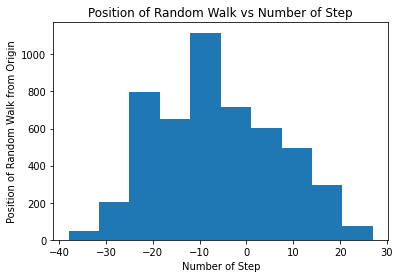

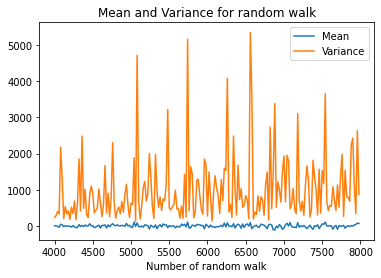

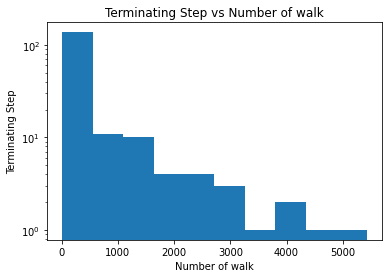

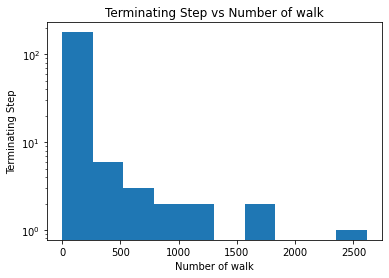

In [26]:
number_of_walks = 5000
origin_point, a, b, step_size_n = 0, 1/2, 1/2, 1

positions_array, terminating_step = random_walker_function(origin_point, a, b, step_size_n, number_of_walks)
plotB(positions_array)


#-------------------------------------------------------------------------------

subset_array = list(np.arange(4000, 8000, 20))

origin_point, a, b, step_size_n = 0, 1/2, 1/2, 1
mean_array, variance_array = [], []


for i in subset_array:

    positions_array, terminating_step = random_walker_function(origin_point, a, b, step_size_n, i)
    mean_position = np.mean(positions_array)
    variance = np.var(positions_array)
    mean_array.append(mean_position)
    variance_array.append(variance)


plotC(subset_array, mean_array, variance_array)


#-------------------------------------------------------------------------------


subset_array = list(np.arange(4000, 8000, 20))

origin_point, a, b, step_size_n = 0, 1/2, 1/2, 1
mean_array, variance_array = [], []
point_of_termination = 10
terminating_list = []

for i in subset_array:
    positions_array, terminating_step = random_walker_function(origin_point, a, b, step_size_n, i, point_of_termination)
    terminating_list.append(terminating_step)
terminating_list = [x for x in terminating_list if x is not None]

plotD(terminating_list)

#------------------------------------------------------------------------------

origin_point = 8
subset_array = list(np.arange(4000, 8000, 20))
a, b, step_size_n = 1/2, 1/2, 1
mean_array, variance_array = [], []
point_of_termination = 10
terminating_list = []


for i in subset_array:
    positions_array, terminating_step = random_walker_function(origin_point, a, b, step_size_n, i, point_of_termination)
    terminating_list.append(terminating_step)
terminating_list = [x for x in terminating_list if x is not None]

plotD(terminating_list)


The representation of a pair formed from two consecutive random numbers x_i and x_i+1 is a set of monotonically increasing sequences with equal differences between the elements of the sequence.The Linear Congruential Random Number Generator does generate random numbers but it is not true random numbers.
 
 
The Kolmogorov-Smirnov test applied to the modelled system converges to zero as  N approaches infinity which gives us the idea that the points are likely to be drawn from the same distributions.When the system is normalised, it is found that the values of 1000 data points are close to 0, so the RNG has the even distribution between 0 and 1. 

 
The Gap Test when applied to the RNG, it is found that the probability of getting data in the given data window is very high. With many ranges of data intervals [a,b], it is observed by holding a at the constant value and raising b increases probability but the vice-versa decreases the probability to get the values in the required range, thus concluding Mersenne Twister to be better method to generate the RN as shown by the gap test.
 

The random number histogram shows Gaussian distribution.
 
From mean and variance plots it can be concluded that the mean is 0 since the number of walks is approaching infinity. Also, the variance graph is quadratic for a given number of walks. It follows that the travel distance of the rollator always remains small, even with many walks.
 
When the end point is set to 10, the graph of completion steps versus number of walks has a finite number of breaks, leading to the conclusion that sometimes the runner isn't even too far from the start point.


Roshan Shah